In [55]:
# dataset - https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## Problem Statement 

 - **Problem Statement for Heart Disease Data Analysis Project:**

Heart disease remains one of the leading causes of mortality worldwide, making early detection and understanding of risk factors critical for preventative healthcare. This project aims to analyze a heart disease dataset to identify key health metrics and demographic factors that influence the likelihood of heart disease. By examining relationships between variables such as age, gender, cholesterol levels, blood pressure, and chest pain types, we seek to uncover patterns and correlations that can help predict heart disease risk. Using visualizations and statistical analysis, this project will explore trends within the data, detect anomalies, and compare distributions among individuals with and without heart disease. Ultimately, these insights can contribute to better risk stratification and support healthcare providers in identifying high-risk individuals, potentially guiding interventions for those most vulnerable.

### 1.Import Libraries 

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
#loading dataset
import numpy as np
#visualisation
%matplotlib inline
#EDA
from collections import Counter

from ydata_profiling import ProfileReport


#import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

### 2. Display Top 10 Rows of the Dataset

In [57]:
heart = pd.read_csv('heart.csv')
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


### 3. Check the last 10 rows of dataset

In [58]:
heart.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### 4.Find shape of our dataset (number of rows and number of columns)

In [59]:
print("Number of rows: ", heart.shape[0])
print("Number of columns: ", heart.shape[1])

Number of rows:  1025
Number of columns:  14


### 5.Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [60]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### 6.Check for Null Values 

In [61]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 7.Check for Duplicate Data entries and Drop them 

In [62]:
heart_dup = heart.duplicated().any()
print(heart_dup)

True


- True means this exists some duplicated data entries or repetation of same data multiple times 

In [63]:
heart = heart.drop_duplicates()
print("no of columns = ",heart.shape[1])
print("no of rows =",heart.shape[0])


no of columns =  14
no of rows = 302


### 8.Get overall Statastics about th dataset

In [64]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 9. Figuring Correlation between all Attributes 

In [65]:
correlated_attributes = heart.corr(method = 'pearson')

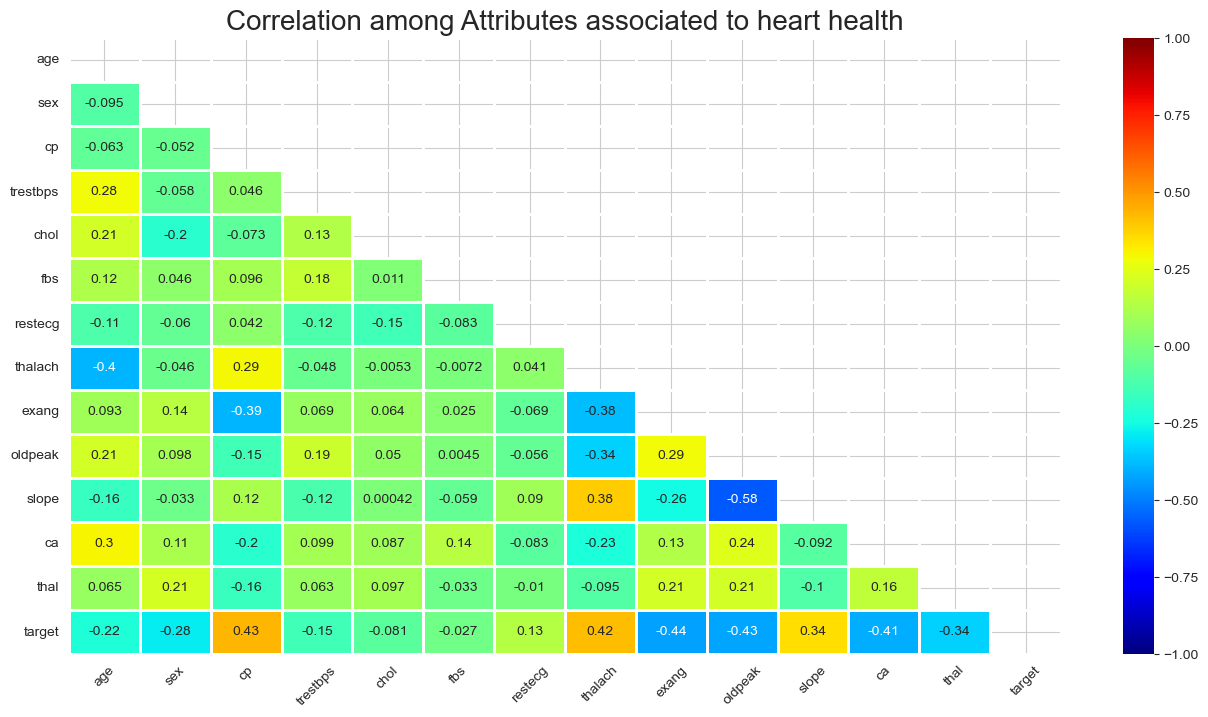

In [66]:
plt.figure(figsize=(16,8))
mask = np.zeros_like(correlated_attributes)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlated_attributes, cmap='jet', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=1.0,annot=True)
plt.yticks(rotation=0) 
plt.xticks(rotation=45) 
plt.title('Correlation among Attributes associated to heart health', fontsize = 20)
plt.show()

### 10. How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?

In [67]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [68]:
heart['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

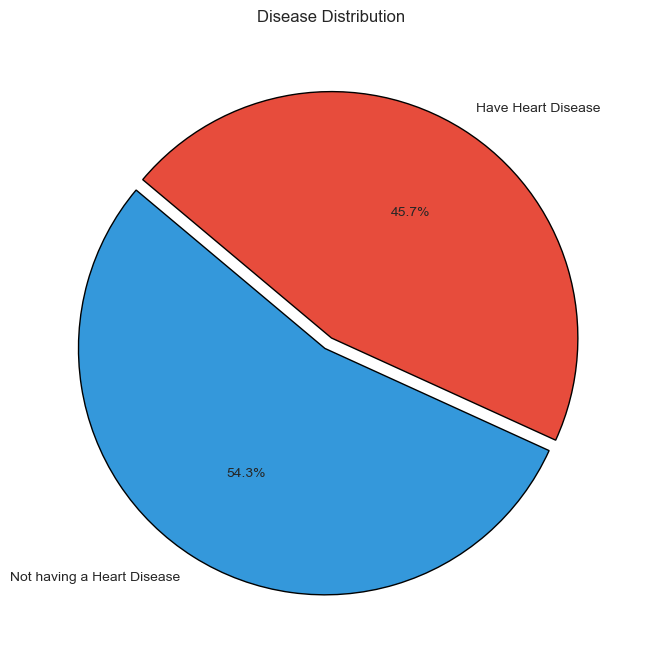

In [69]:
# Count the occurrences of each gender (0 and 1 in the 'sex' column)
gender_counts = heart['target'].value_counts()

# Define labels and colors for the pie chart
labels = ['Not having a Heart Disease', 'Have Heart Disease']
colors = ['#3498db', '#e74c3c']  # Custom colors (e.g., blue for Male, red for Female)
explode = (0.05, 0)  # Slightly "explode" the 'Male' section for emphasis

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=140, 
        colors=colors, explode=explode, wedgeprops={'edgecolor': 'black'})

# Title and display
plt.title('Disease Distribution')
plt.show()


### 11. Gender distribution in dataset`

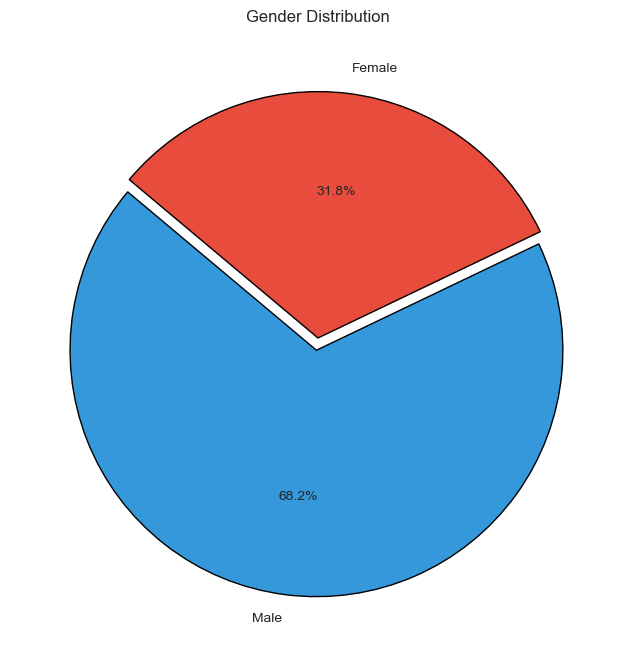

In [70]:
# Count the occurrences of each gender (0 and 1 in the 'sex' column)
gender_counts = heart['sex'].value_counts()

# Define labels and colors for the pie chart
labels = ['Male', 'Female']
colors = ['#3498db', '#e74c3c']  # Custom colors (e.g., blue for Male, red for Female)
explode = (0.05, 0)  # Slightly "explode" the 'Male' section for emphasis

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=140, 
        colors=colors, explode=explode, wedgeprops={'edgecolor': 'black'})

# Title and display
plt.title('Gender Distribution')
plt.show()


### 12. Find Gender Distribution According to The Target Variable

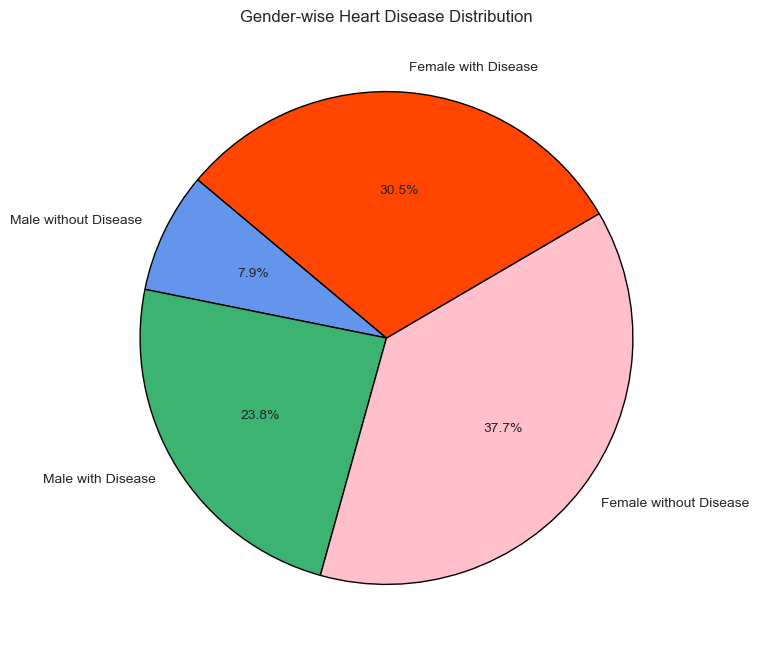

In [71]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Group by gender and target (disease status) and count occurrences
# Assuming 'target' column is 1 for heart disease presence, 0 for absence
gender_disease_counts = heart.groupby(['sex', 'target']).size().unstack()

# Define labels for the pie chart
labels = ['Male without Disease', 'Male with Disease', 'Female without Disease', 'Female with Disease']

# Set colors: Blue for Male without disease, Green for Male with disease,
# Pink for Female without disease, Red for Female with disease
colors = ['#6495ED', '#3CB371',  # Male: Blue (without disease), Green (with disease)
          '#FFC0CB', '#FF4500']  # Female: Pink (without disease), Red (with disease)

# Flatten data and create a pie chart
values = gender_disease_counts.values.flatten()
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Title and display
plt.title('Gender-wise Heart Disease Distribution')
plt.show()


 -  from this count plot, there are more men for disease and non-disease target.

### 13 Check Age Distribution in the Dataset

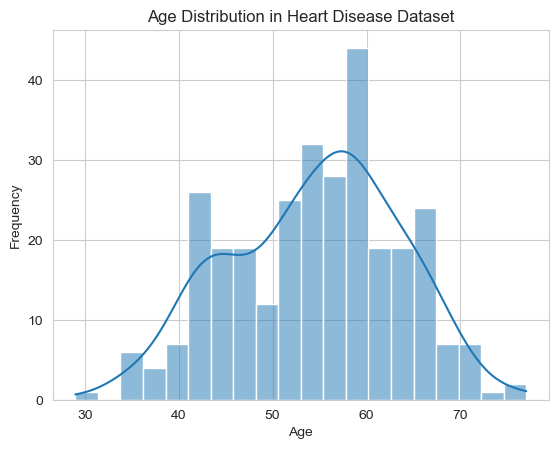

In [72]:
sns.histplot(data=heart, x='age', bins=20, kde=True)  # kde=True adds a Kernel Density Estimate curve
plt.title('Age Distribution in Heart Disease Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


- from this plot we can see that most of the people in this study aged between 50-60

## 14. Which Chest Pain Type is More Common

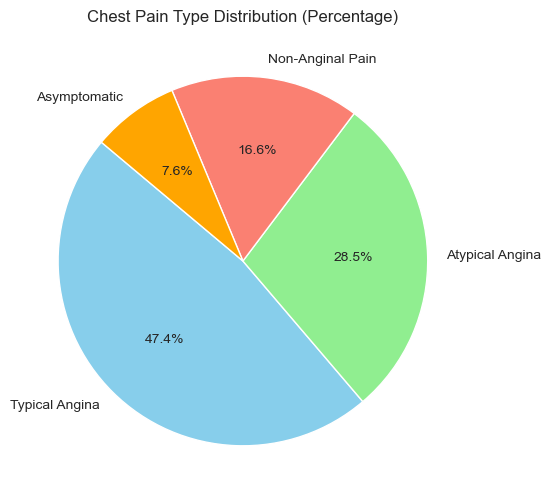

In [73]:
import matplotlib.pyplot as plt

# Calculate value counts and percentages
cp_counts = heart['cp'].value_counts()
cp_labels = ["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"]
cp_percentages = [f'{count/sum(cp_counts)*100:.1f}%' for count in cp_counts]

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(cp_counts, labels=cp_labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title("Chest Pain Type Distribution (Percentage)")
plt.show()


## 15. Show The Chest Pain Distribution As Per Target Variable

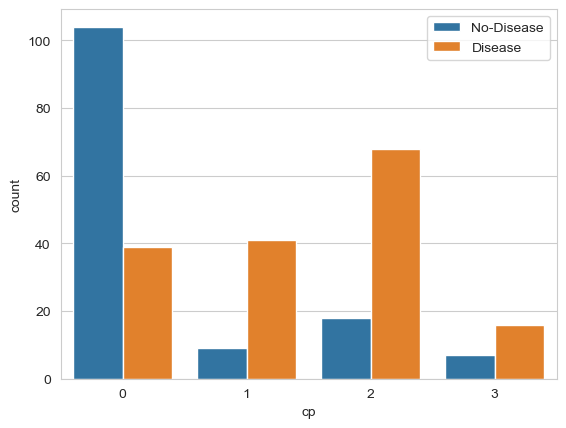

In [74]:
sns.countplot(x='cp',hue='target', data=heart)
plt.legend(labels=["No-Disease","Disease"])
plt.show()

 - from this graph we can see that healthy people also have chest pain.
 - chest pain can be subjective. Due to stress, physical activities etc.
 - it varies between gender

## 16. Show Fasting Blood Sugar Distribution According To Target Variable

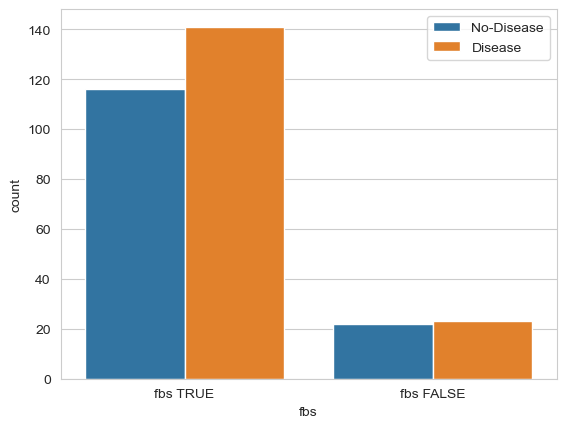

In [75]:
sns.countplot(x='fbs',hue='target',data=heart)
plt.legend(labels=['No-Disease','Disease'])
plt.xticks([0,1],["fbs TRUE","fbs FALSE"])
plt.show()

# fbs is a diabetic indicator
# fbs greater than 120 are diabetics
# higher number of diabetics patient without heart disease

### 17.  Check Resting Blood Pressure Distribution

<Axes: >

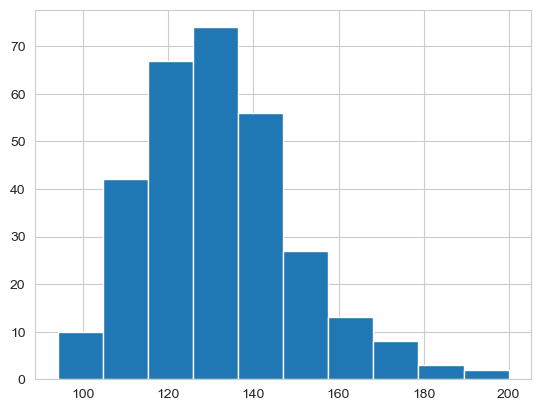

In [76]:
# lets create a histogram

heart['trestbps'].hist()



 -  from this histogram we can see that the blood pressure of the people in this study is between 120 and 140

### 18. Compare Resting Blood Pressure As Per Sex Column

 - lets use "facetgrade class"
 - facetgrade class is useful when you want to visualize the distribution of variable or the relationship between multiple variables separately, within subset of your dataset.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


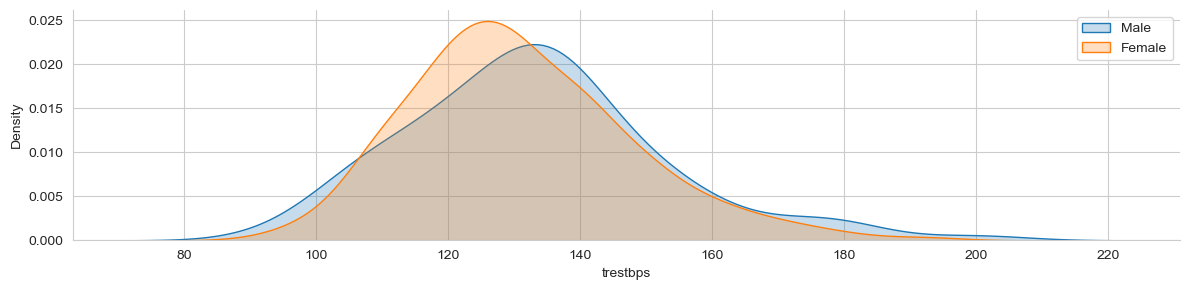

In [77]:

g = sns.FacetGrid(heart,hue="sex", aspect=4)
g.map(sns.kdeplot,'trestbps',fill=True)
plt.legend(labels=['Male','Female'])



- we're using kdeplot of seaborn
-  we have to compare Resting BP as per sex column. so we have to pass "Resting Blood Pressure" column. Here it is trestbps

 -  woman has lower Resting blood pressure compared to men.
-  for women os around 120, while for men it is little less than 140

### 19. Show Distribution of Serum cholesterol

 -  we are using histogram to check distribution of the column

<Axes: >

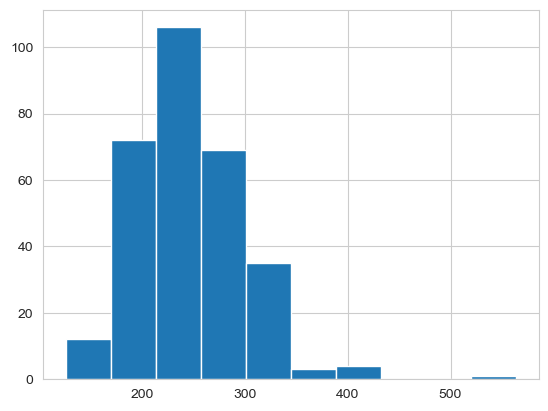

In [78]:
heart['chol'].hist()

### 20. Plot Continuous Variables

- In this question, we are gonna plot continuous variables.
- first we have to separate columns which contain continuous values and which contains categorical values.


In [79]:
# lets create to empty list.

categ_val=[]
cont_val=[]

for column in heart.columns:
    if heart[column].nunique() <=10:
        categ_val.append(column)
    else:
        cont_val.append(column)

In [80]:
categ_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [81]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [82]:
heart[column].nunique()

2

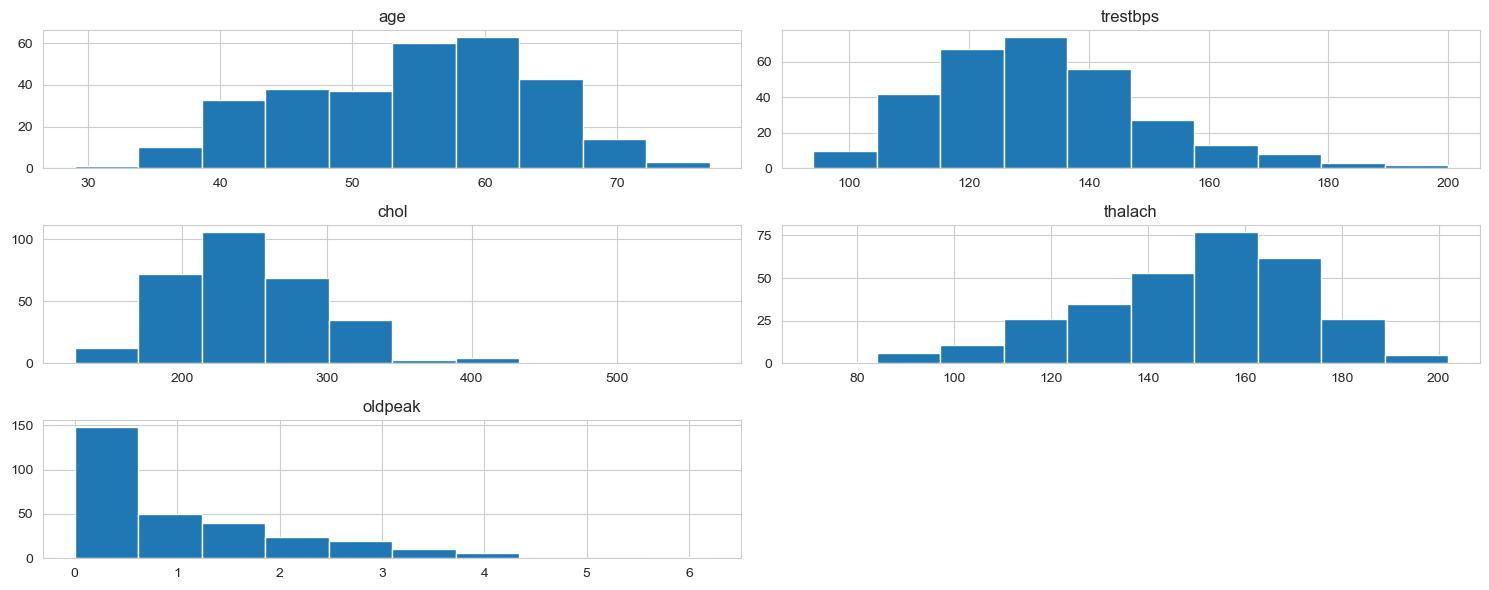

In [83]:
heart.hist(cont_val,figsize=(15,6))
plt.tight_layout()
plt.show()

In [84]:
#loading dataset
import numpy as np
#visualisation
%matplotlib inline
#EDA
from collections import Counter

from ydata_profiling import ProfileReport


#import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [85]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [86]:
profile = ProfileReport(heart, title="Pandas Profiling Report", explorative=True)

In [87]:
profile.to_file("output.html")  # Save as HTML file
profile.to_file("output.json")   # Save as JSON file

C:\Users\Abhishek\AppData\Roaming\Python\Python311\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\Abhishek\AppData\Roaming\Python\Python311\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [88]:
y = heart["target"]
X = heart.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [89]:
#Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [90]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({1: 128, 0: 113})

In [91]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#ML models
Here I take different machine learning algorithm and try to find algorithm which predict accurately.

Logistic Regression
Naive Bayes
Random Forest Classifier
Extreme Gradient Boost
K-Nearest Neighbour
Decision Tree
Support Vector Machine

In [92]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[20  5]
 [ 5 31]]


Accuracy of Logistic Regression: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        25
           1       0.86      0.86      0.86        36

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [93]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[20  5]
 [ 7 29]]


Accuracy of Naive Bayes model: 80.32786885245902 

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.85      0.81      0.83        36

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [94]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=0,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[18  7]
 [ 4 32]]


Accuracy of Random Forest: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        25
           1       0.82      0.89      0.85        36

    accuracy                           0.82        61
   macro avg       0.82      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



In [95]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[13 12]
 [ 0 36]]


Accuracy of Extreme Gradient Boost: 80.32786885245902 

              precision    recall  f1-score   support

           0       1.00      0.52      0.68        25
           1       0.75      1.00      0.86        36

    accuracy                           0.80        61
   macro avg       0.88      0.76      0.77        61
weighted avg       0.85      0.80      0.79        61



In [96]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[19  6]
 [ 5 31]]


Accuracy of K-NeighborsClassifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.84      0.86      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [97]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 3)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[17  8]
 [ 6 30]]


Accuracy of DecisionTreeClassifier: 77.04918032786885 

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        25
           1       0.79      0.83      0.81        36

    accuracy                           0.77        61
   macro avg       0.76      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



In [98]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[18  7]
 [ 6 30]]


Accuracy of Support Vector Classifier: 78.68852459016394 

              precision    recall  f1-score   support

           0       0.75      0.72      0.73        25
           1       0.81      0.83      0.82        36

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



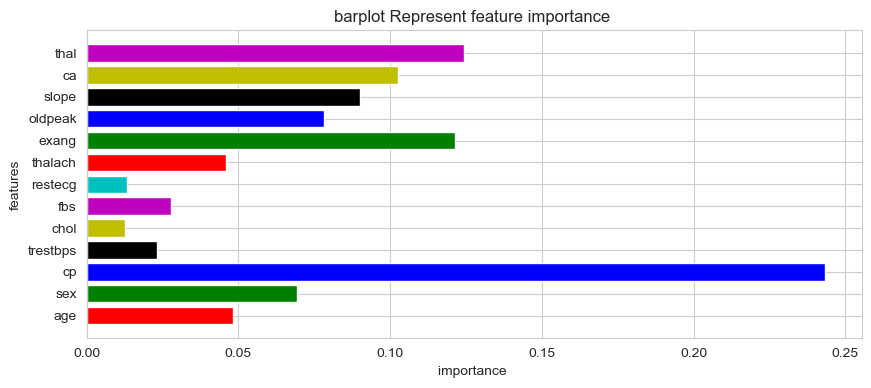

In [99]:
# Define colors as a list
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']  # Red, Green, Blue, Black, Yellow, Magenta, Cyan

imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = my_colors)
plt.show()

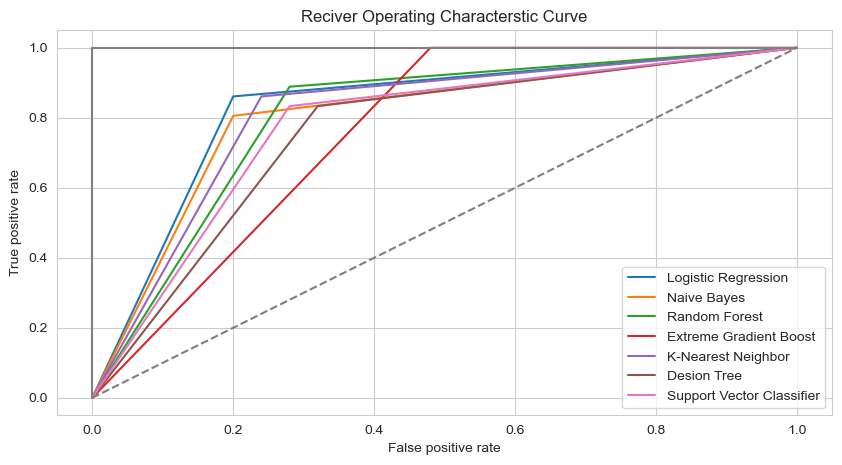

In [100]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [101]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,83.606557
1,Naive Bayes,80.327869
2,Random Forest,81.967213
3,Extreme Gradient Boost,80.327869
4,K-Nearest Neighbour,81.967213
5,Decision Tree,77.049180
6,Support Vector Machine,78.688525


In [102]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,83.606557
1,Naive Bayes,80.327869
2,Random Forest,81.967213
3,Extreme Gradient Boost,80.327869
4,K-Nearest Neighbour,81.967213
5,Decision Tree,77.049180
6,Support Vector Machine,78.688525


In [103]:
#In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.

In [104]:
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[19  6]
 [ 5 31]]


Accuracy of StackingCVClassifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.84      0.86      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



Conclusion¶
1) Logistic Regression gives the best Accuracy compared to other models.

2) Exercise induced angina,Chest pain is major symptoms of heart attack.
